# Importing Data in Python

There are numerous different ways to import data into Python. Below are some of the most common. These include flatfiles such .txt and .csv. Other common data types that an analyst may run into include Excel sheets, MATLAB, SAS, and relational database data. More recently for me, I came across importing pickle data. For a brief intro, click here <https://wiki.python.org/moin/UsingPickle>. Below are the main modules that will be needed for this overview. I will caveat that I am not providing the data files to complete this; however, most can be found on Kaggle or GitHub.

In [ ]:
# Importing course packages; you can add more too!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import h5py
from sas7bdat import SAS7BDAT
from sqlalchemy import create_engine
import pickle

# Importing Files

Python has the ability to import files for reading and writing. Below you will find the code to pull in a flatfile. The main concept to remember when doing this is wether or not you want to read this file or write to this file. This will change how you open the file. In order to never forget to close a file, a context manager can be utilized. You can take this one step further and build a function to read in files faster. All code examples, except the function option, can be seen below. If you run the code, it will generate an error as is. Replace 'path/file.txt' with your actual file. This is base means to import data; however, most of us will want to do more with it than read or write. The rest of this will cover getting the data into a dataframe in which you can utilize for exploratory analysis or machine learning.

In [ ]:
## Caution is needed, this can permenately erase the data in the file. To avoid that, I commented out the write example and context editor.

#Open a .txt file as read only
filename = 'seaslug.txt'
file = open(filename, mode='r') # the 'r' indicates read
text = file.read() # this line pulls the data/text out of the file
file.close() # this closes the open file to prevent editing of it and memory usage
#print(text)

#Open a file to write / edit it
#filename = 'path/filename.txt'
#file = open(filename, mode='w') # the 'w' indicates write
#file.close()

#Context manager example
#with open('path/filename.txt', 'r') as file:
    #print(file.read())

## Importing in Numpy

As most of use know, Numpy is a powerful number crunching module. For more on Numpy, if unfamiliar, visit <Numpy.org>. The following will look at importing flatfiles into Numpy. Make sure that you imported numpy as np. As .csv files are rather common, the code below will focus on those. As most data files have columns and rows, telling the import what seperates those is important. The most common seperators are ',' and tabs. These are called delimiters. Ensure you specify the correct delimetor during import. A comma will be indicated as delimiter=',' and a tab will be indicated as delimiter='\t'. The two most common ways to get data into a Numpay array are np.loadtxt() <https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html> and np.genfromtext() <https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html>. From here on out, we will concentrate on Pandas.

In [ ]:
## np.loadtxt() example
filename = 'seaslug.txt'
#Create a data array
#The only required argument is the filename. skiprows allows you to skip unneccessary rows such as column names, usecols allows you to select which columns to import.
data = np.loadtxt(filename, delimiter='\t', dtype=str)
#Take a look at your data.
#print(data)

## np.genfromtxt example and recommended if the data file has comments and missing values
#The only required argument is the filename. skiprows allows you to skip unneccessary rows such as column names, usecols allows you to select which columns to import.
data_2 = np.genfromtxt(filename, delimiter='\t', skip_header=0, dtype=str)
#Take a look
#print(data_2)

## np.recfromcsv() example
file = 'titanic_sub.csv'
data_csv = np.recfromcsv(file)
#print(data_csv)

## Importing Flat Files with Pandas

Having originally worked with R, Pandas' dataframe is a known entity for me. Importing into a dataframe makes exploratory analysis and munging a much simplier task in my opinion. To demonstrate the task of importing flat files, I will utilize the famous 'Titanic' dataset, the 'Seaslug' dataset from a CSV, and 'Battledeath' from Excel. The same command pd.read_csv() can be utilized on .csv and .txt files; however, to import data from Excel pd.read_excel() is needed. 

In [ ]:
#CSV example
data = pd.read_csv('titanic_sub.csv')
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#TXT Example
data = pd.read_csv('seaslug.txt')
data.head()

,Time\tPercent
0,99\t0.067
1,99\t0.133
2,99\t0.067
3,99\t0
4,99\t0


In [ ]:
#Excel Example
data = pd.read_excel('battledeath.xlsx')
#If the Excel file has more than one sheet, you can specify which sheet like the example below.
# data = pd.read_excel('filename', sheet_name='name')
data.head()

,"War, age-adjusted mortality due to",2002
0,Afghanistan,36.083990
1,Albania,0.128908
2,Algeria,18.314120
3,Andorra,0.000000
4,Angola,18.964560


## Importing SAS

Statistical Analysis System or SAS is one of the most popular systems for statistical analysis; therefore, coming across a SAS dataset is probable. To import it to our friendly Python environment, utilize the code below.

In [ ]:
#from sas7bdat import SAS7BDAT
with SAS7BDAT('sales.sas7bdat') as file:
    data_sas = file.to_data_frame()
    
data_sas.head()

,YEAR,P,S
0,1950.0,12.9,181.899994
1,1951.0,11.9,245.000000
2,1952.0,10.7,250.199997
3,1953.0,11.3,265.899994
4,1954.0,11.2,248.500000


In [ ]:
#SAS can also produce a STATA file, use this for STATA

data = pd.read_stata('disarea.dta')

data.head()

,wbcode,country,disa1,disa2,disa3,disa4,disa5,disa6,disa7,disa8,...,disa16,disa17,disa18,disa19,disa20,disa21,disa22,disa23,disa24,disa25
0,AFG,Afghanistan,0.00,0.00,0.76,0.73,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.02,0.00,0.00
1,AGO,Angola,0.32,0.02,0.56,0.00,0.0,0.00,0.56,0.0,...,0.0,0.4,0.0,0.61,0.00,0.0,0.99,0.98,0.61,0.00
2,ALB,Albania,0.00,0.00,0.02,0.00,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.16
3,ARE,United Arab Emirates,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00
4,ARG,Argentina,0.00,0.24,0.24,0.00,0.0,0.23,0.00,0.0,...,0.0,0.0,0.0,0.00,0.05,0.0,0.00,0.01,0.00,0.11


## Importing MATLAB

When you follow the code below, you will basically be turning a dictionary into a dataframe. When I print out of the dictionary keys, the keys without the lines are the true keys you want to import. Each has numerous arrays. Look at the documentation of the file you are importing to make sure you import the data you truly want.

In [ ]:
#import scipy.io
filename = 'ja_data2.mat'
mat = scipy.io.loadmat(filename)
print(mat.keys())
mat_to_series = pd.Series(mat)
series_to_df = pd.DataFrame({'label':mat_to_series.index, 'list':mat_to_series.values})
series_to_df.head()


dict_keys(['__header__', '__version__', '__globals__', 'rfpCyt', 'rfpNuc', 'cfpNuc', 'cfpCyt', 'yfpNuc', 'yfpCyt', 'CYratioCyt'])


,label,list
0,__header__,"b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Crea..."
1,__version__,1.0
2,__globals__,[]
3,rfpCyt,"[[0.0, 238.62933333333334, 238.62264150943398,..."
4,rfpNuc,"[[0.0, 183.3425605536332, 187.84859154929578, ..."


## Importing Pickle

Pickle files are Python's native file type. Pickled files are serialized or converted to bytestream. Everything I have come across indicates users should be weary of importing pickle files from an unknown source as it could contain malicious code. I currently do not have a pickle file, so the code below is commented out.

In [ ]:
#import pickle
#data = pd.read_pickle('./name.pkl')
#data.head()

## Importing Hierarchial Data Format v 5 (HDF5)

Along with Pickle file, HDF5 is relatively new to me. It apparently is utilized to store gigabytes, even terabytes, of numerical data. With the ability to get that into a dataframe, I'm not scared. Once we import an HDF5 file, it will act as a dictionary. Like the basic importing a flat file, we will want to specify 'r' during the import to indicate that we only want to read the file.

<class 'h5py._hl.files.File'>
meta
quality
strain
detail
injections
simple
<KeysViewHDF5 ['DQDescriptions', 'DQShortnames', 'DQmask']>


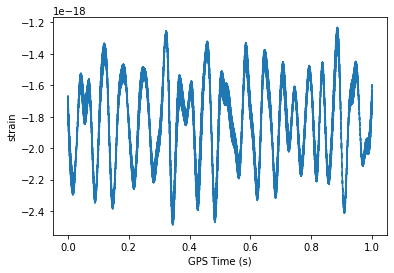

In [ ]:
#HDF5 Example
#import h5py

filename = 'L-L1_LOSC_4_V1-1126259446-32.hdf5'
data = h5py.File(filename, 'r')
print(type(data))

#To get the dictionary keys
for key in data.keys():
    print(key)
    
#You can keep drilling down. The wavelength data is in 'strain'. Fun to plot these.
for key in data['quality'].keys():
    print(key)
    
print(data['quality']['simple'].keys())

strain = data['strain']['Strain'].value
num_samples = 10000
time = np.arange(0, 1, 1/num_samples)
plt.plot(time, strain[:num_samples])
plt.xlabel('GPS Time (s)')
plt.ylabel('strain')
plt.show()

## Importing Relational Database Data

Doesn't every data lover enjoy getting some data out of a database. Well, even if you don't, let's make sure we can.

In [ ]:
#from sqlalchemy import create_engine

#Step 1: Create Access Engine
engine = create_engine('sqlite:///Chinook.sqlite')

#Step 2: Get those table names if unknown
tablenames = engine.table_names()
print(tablenames)

#Step 3: SELECT that data, to include joins
customer = pd.read_sql_query("SELECT * FROM Customer", engine)
customer.head()

['Album', 'Artist', 'Customer', 'Employee', 'Genre', 'Invoice', 'InvoiceLine', 'MediaType', 'Playlist', 'PlaylistTrack', 'Track']


,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5
2,3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3
3,4,Bjørn,Hansen,None,Ullevålsveien 14,Oslo,None,Norway,0171,+47 22 44 22 22,None,bjorn.hansen@yahoo.no,4
4,5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,None,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4


### Closing Remarks

Yes, I know we need to know how to import web data into a dataframe. Maybe next time. However, there are a few ways here to get some excellent data into a Pandas dataframe to begin your journey. Best of luck to you.